In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import time

from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

warnings.filterwarnings('ignore')

In [2]:
# 用來印出數字的function
def printNUM(num, word):
    if num < 10:
        print('[00' + str(num) + ']', word)
    elif num < 100:
        print('[0' + str(num) + ']', word)
    else:
        print('[' + str(num) + ']', word)

In [87]:
url = 'https://www.cupoy.com/newsfeed/topicgrp/tech_tw'
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get(url)
time.sleep(5)

count = 1
summarylist = []
titlelist = []
while (count <= 500) :
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")
    
    for artical in soup.find_all('div', class_ = "sc-eEieub sc-iuDHTM ibJqYc"):
        
        # 將文章標題、文章內容、文章來源抓下來
        title = artical.find('h6').text
        content = artical.find('p').text
        source = artical.find('div', class_ = "sc-gacfCG bPSpUf").text
        
        # 防止爬到重複的文章
        if title not in titlelist:
            printNUM(count, title)
            # 將各資料存進list以供後續分析
            titlelist.append(title)
            summarylist.append({'種類': source,
                                '標題': title, 
                                '內容': content})
            # count表文章爬到的數目
            count += 1
        # 停止條件，抓到500篇文章即終止程式
        if count == 501:
            break
    
    # 將網頁繼續向下滑
    time.sleep(0.7)
    browser.execute_script("window.scrollTo(0, 1000000);")

[001] 《戰慄時空：艾力克斯》定於 3 月 23 日上線
[002] Moto 的折疊 Razr 手機不意外地非常難修理
[003] Apple 把編程學習遊戲 Swift Playgrounds 帶到 Mac
[004] 小米 10 系列甫發表 小米 10 Pro 就以 124 新高分摘下 DXO MARK 拍照冠軍寶座 - 電獺少女
[005] 空拍機新法規 3/31 上路！只剩八縣市可飛行 沒註冊、沒證照等最高將被罰 150 萬 - 電獺少女
[006] Archiveror 快速備份、永久保存當前看到的網頁內容（Chrome、Firefox）
[007] 微軟 Surface Laptop 3 臺灣上市！搭載最新第十代 Intel Core 處理器 效能、續航力升級 還有新色砂岩金、墨黑 - 電獺少女
[008] 臺灣軍用車特斯拉得標！引爆 Reddit 鄉民熱議 - INSIDE
[009] 臺灣售票 TixCraft 拓元正式被 Live Nation 收購，成 Ticketmaster 一員 - INSIDE
[010] Fintech周報第132期：純網銀拚開業，LINE Bank、將來銀行釋出IT招募訊息搶人才 | iThome
[011] Xbox 跟 Nike 聯名推出喬丹限量版！想要嗎？快來抽！ - INSIDE
[012] 武漢肺炎波及！三星：主產地越南的收入恐降 50% - INSIDE
[013] 蘋果擴增Quick Look，可望實現零售商AR銷售 | iThome
[014] 蘋果支付的逆襲！報告：五年後 Apple Pay 佔全球卡片 10% 交易量 - INSIDE
[015] 摸底安防系「最熱」AI測溫產業：日供百套設備，單臺報價過萬 | AI 戰疫 | 機器之心
[016] Google Project Zero：三星保護手機的作法反而讓Android不安全 | iThome
[017] WhatsApp全球用戶數突破20億 | iThome
[018] GCP改善單租戶節點更新功能加入即時搬遷政策 | iThome
[019] 技術、應用、開放平臺，三大維度概括2019年中國AI產業發展 | 機器之心
[020] 鍾南山、李蘭娟團隊從糞便中分離出新冠活病毒，到底還有多少潛在傳播途徑？ | 機器之心
[021] 3999

[172] SEMI：2020 年全球半導體市場復甦樂觀 新冠狀病毒影響短暫 - INSIDE
[173] Elastic Security新版採用新的威脅偵測引擎 | iThome
[174] 資安一週第80期：供應鏈安全已成資安防護新重點，美國防部開始要求承包商取得相應安全等級認證 | iThome
[175] 大疆「空軍」逆行戰疫：消殺6億平方米，防護千座村落 | AI戰疫 | 機器之心
[176] 百倍變焦！三星發表旗艦 Galaxy 20 系列、Galaxy Buds+ - INSIDE
[177] Dell電腦內建管理軟體SupportAssist 爆權限升級漏洞 | iThome
[178] 百度主辦ACL 2020首屆同傳研討會，70小時數據集向同傳評測參與者開放 | 機器之心
[179] 三星發表Galaxy S20旗艦手機系列與新款摺疊螢幕手機Galaxy Z Flip | iThome
[180] iPhone「電池門」事件後續，法國對蘋果罰款 2,500 萬歐元 | TechNews 科技新報
[181] 半世紀的躍進！USB-C 充電器處理速度超越阿波羅 11 導航電腦 - INSIDE
[182] 《瘟疫公司》創辦人 James Vaughan 原來不只是個開發者 - INSIDE
[183] 臉書開源3D深度學習函式庫PyTorch3D | iThome
[184] WHO 為武漢肺炎正名「 COVID-19 」稱視為「頭號公敵」積極對抗 - INSIDE
[185] 別再逼業務員寫日報表啦！3條方程式，突破業績欠佳的瓶頸 | 經理人
[186] 煉丹感悟：On the Generalization of RL | 機器之心
[187] 唐鳳訪美國華府 受邀分享對抗假訊息及開放政府經驗 - INSIDE
[188] 三星 Galaxy Z Flip 首採可摺式玻璃螢幕，藍牙耳機 Galaxy Buds+ 同步登場 | TechNews 科技新報
[189] 三星旗艦 Galaxy S20 系列相機大進化，8K 錄影、1.08 億畫素鏡頭與百倍變焦 | TechNews 科技新報
[190] 三巨頭共聚AAAI：Capsule沒有錯，LeCun看好自監督，Bengio談注意力 | 機器之心
[191] ．建築自動控制 BA 系統感測器有哪

[332] 新思維、新視野、新科技、新價值！《鍶科技》正式上線
[333] 監控疾病的兩難：要私隱還是公眾安全？ - *CUP
[334] 人臉辨識新創Clearview AI，遭推特與谷歌「封殺」
[335] 亞馬遜用AI語音技術，為企業提供品牌服務
[336] ．「冷與熱」的比拼 —— 智慧服務 vs 人工服務 - 3S Market「全球智慧科技應用」市場資訊網
[337] 完整的 Tensorflow 2 和 Keras 深度學習訓練營 - Soft & Share 線上課程資訊分享
[338] AlphaGo的開發公司DeepMind 將以海馬記憶模式設計 打造全新「MEMO」人工智慧架構 (151455) - 癮科技 Cool3c
[339] 蘋果發表研究論文，揭示Siri的祕密
[340] 人工智慧將成為白領工作者的基本技能 - Yahoo奇摩理財
[341] Climate Change AI | Tackling Climate Change with Machine Learning
[342] 为什么谷歌认为人工智能需要监管？
[343] 你知道 Android 18 長什麼樣子？鳥山明多年前就已在七龍珠把"她"畫出來了 - 硬是要學
[344] 人工智慧將成為白領工作者的基本技能 | 信傳媒
[345] AI 搶先 WHO 一週抓出武漢肺炎！善用數據給政府的防疫啟示 | TechOrange
[346] SAS專欄｜預防虐兒、打擊毒品⋯⋯佛心AI默默做了哪些善事？ - 未來城市@天下
[347] 武漢肺炎 防疫好幫手 疾管署推 Line「疾管家」 AI 互動問答助理！ - Saydigi-Tech | 點子科技
[348] 數學在機器學習領域的應用專業課程 - Soft & Share 線上課程資訊分享
[349] 中國打造最強「人臉監控系統」　蒙面、變裝皆無效！｜天下雜誌
[350] 港產初創 Mapxus 開發室內地圖　為智能城市打好基礎 - UNWIRE.PRO
[351] Intel 去年人工智能業務錄得 38 億美元進帳 - UNWIRE.PRO
[352] 間諜新招數：人工智能生成假照片 - *CUP
[353] 人臉辨識不安全？Google CEO支持暫停 微軟總裁卻這麼說 - Yahoo奇摩新聞
[354] 失獨媽媽求助阿里：

[496] 研發武漢肺炎疫苗，國衛院：拚 2 個月研發、半年內臨牀試驗 - INSIDE
[497] Google釋出用來評估機器學習系統長期影響的工具 | iThome
[498] 武漢肺炎影響供應鏈，全球車廠恐面臨關閉潮 - INSIDE
[499] 疫情肆虐下，中國頂尖學者跨時區“雲參與”AAAI大會，多場國際技術峯會受影響 | 機器之心
[500] 衛星網路！SpaceX 星鏈計畫 Starlink 傳擬 IPO - INSIDE


In [88]:
# 將summarylist變成Df格式並顯示
summaryDf = pd.DataFrame(summarylist)
summaryDf

,內容,標題,種類
0,和其他備受期待的大作逐一推遲到了下半年不同，Valve 這裡似乎是完全依照著既定的三月推出時...,《戰慄時空：艾力克斯》定於 3 月 23 日上線,虛擬實境
1,折疊式的手機是目前走在技術最前沿的產品，對於它們的耐久性許多消費者都還是抱持著懷疑的態度的。...,Moto 的折疊 Razr 手機不意外地非常難修理,手機平板
2,Apple 設計的編程學習遊戲 Swift Playgrounds 本來是 iPad 獨佔，...,Apple 把編程學習遊戲 Swift Playgrounds 帶到 Mac,蘋果專區
3,集十年大成之作的小米 10 系列，雖然遇上武漢肺炎疫情，不得不以純線上直播發表,小米 10 系列甫發表 小米 10 Pro 就以 124 新高分摘下 DXO MARK 拍照...,3C產品
4,看來在北部只能去基隆練飛了...,空拍機新法規 3/31 上路！只剩八縣市可飛行 沒註冊、沒證照等最高將被罰 150 萬 - ...,無人駕駛
5,Archiveror 是一個瀏覽器擴充功能，提供使用者快速備份、保存當前看到的網頁內容，Ar...,Archiveror 快速備份、永久保存當前看到的網頁內容（Chrome、Firefox）,Google專區
6,等了四個月終於上了！,微軟 Surface Laptop 3 臺灣上市！搭載最新第十代 Intel Core 處理...,筆電
7,憲兵指揮部購入兩臺特斯拉 Model 3，預計再添入最多 20 臺組成電動車隊。 標籤: R...,臺灣軍用車特斯拉得標！引爆 Reddit 鄉民熱議 - INSIDE,Fintech金融科技
8,Tixcraft 拓元售票系統由邱光宗在 2014 年創立，長期與包括相信音樂 (B’in)...,臺灣售票 TixCraft 拓元正式被 Live Nation 收購，成 Ticketmas...,Fintech金融科技
9,為了衝刺開業，純網銀搶人才大戰再度火熱了起來。最近，LINE Bank、將來銀行皆大動作對外...,Fintech周報第132期：純網銀拚開業，LINE Bank、將來銀行釋出IT招募訊息搶人...,職涯


In [89]:
sourceDict = {}
for source in summaryDf['種類']:
    if source not in sourceDict:
        sourceDict[source] = 1
    else:
        sourceDict[source] = sourceDict.get(source, 0) + 1
dataDf = pd.DataFrame(list(sourceDict.items()))

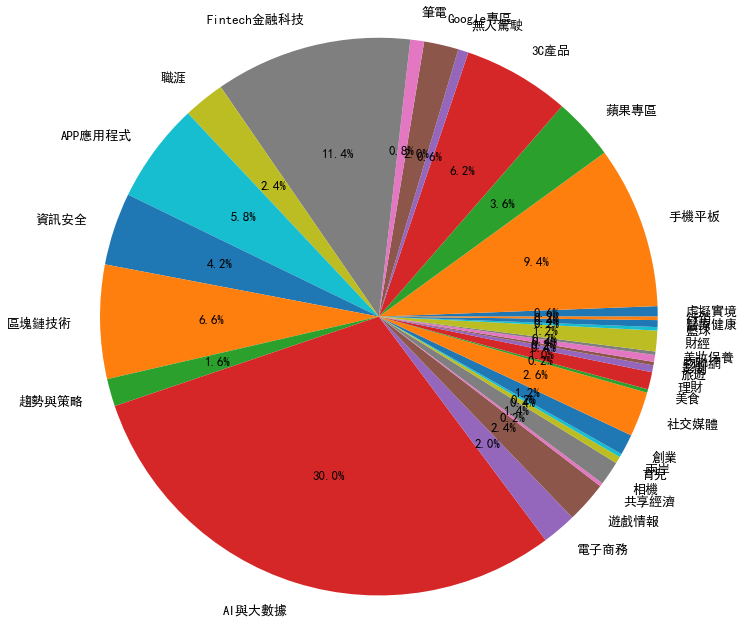

--------------------------------------------------------------------------------------------------------------------


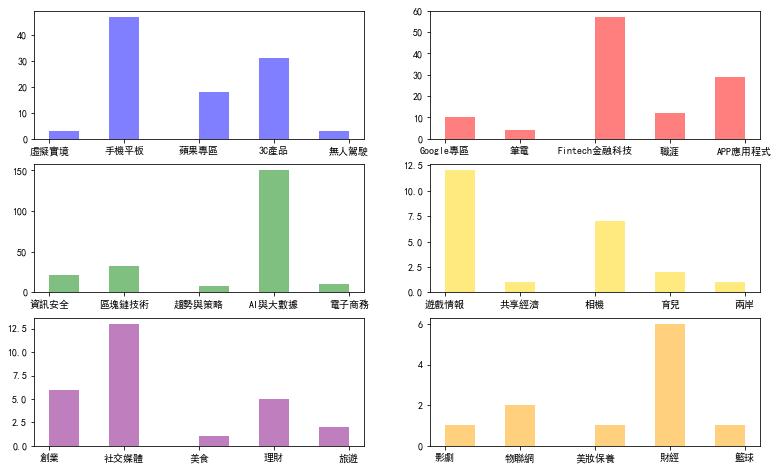

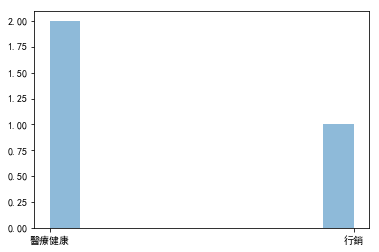

In [94]:
# 解決圖形的中文顯示問題
plt.rcParams['font.sans-serif'] = ['SimHei'] # 替換sans-serif字型
plt.rcParams['axes.unicode_minus'] = False   # 解決座標軸負數的負號顯示問題

# 繪出圓餅圖
plt.figure(figsize=(11,11)) # 顯示圖框架大小
labels = dataDf[0]          # 製作圓餅圖的類別標籤
size = dataDf[1]            # 製作圓餅圖的數值來源
patches,l_text,p_text = plt.pie(size, labels=labels, autopct = '%1.1f%%')
# 調整字體
for t in l_text:
    t.set_size(13)
for t in p_text:
    t.set_size(13)
plt.axis('equal')
plt.show()

print('--------------------------------------------------------------------------------------------------------------------')

# 繪出長條圖
count = 1
color = ['blue', 'red', 'green', 'gold', 'purple', 'orange']
plotlist = []
plt.figure(figsize = (13,8))
for key, value in sourceDict.items():
    for i in range(value):
        plotlist.append(key)
    # 每五個種類就畫一張長條圖
    if count % 5 == 0:
        plt.subplot(3,2,count/5)
        plt.hist(plotlist, alpha=0.5, color=color[int(count/5-1)])
        plotlist = []
    count += 1
plt.show()
plt.hist(plotlist, alpha=0.5)
plt.show()